<a href="https://colab.research.google.com/github/Sameersito010/-Behind-the-Screens-Mobile-Sales-in-Power-BI/blob/main/Employee%20Attrition%20and%20Compensation%20Analysis%20in%20Indian%20Restaurant%20Chain%E2%80%932024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Excel file
file_path = "employee_database_pune_restaurant_attrition.xlsx"
df = pd.read_excel(file_path)

# Display the first 5 rows
print(df.head())


  Employee_id                  Name   Designation  Department Location  \
0     EMP0001        Justin Stewart       Manager     Service     Pune   
1     EMP0002       Debbie Gonzalez          Chef  Front Desk   Mumbai   
2     EMP0003       Veronica Bowman  Receptionist  Management   Mumbai   
3     EMP0004       Justin Gonzales          Chef         Bar  Kolkata   
4     EMP0005  Christina Washington     Sous Chef     Kitchen   Mumbai   

  Date_of_joining  Basic    HRA    DA   CCA  ...  Incentives Amount  Arrear  \
0      2024-07-02  27870  11148  2787   589  ...                  0       0   
1      2024-07-19  27856  11142  2785   929  ...                  0    4642   
2      2024-09-17  17055   6822  1705  1480  ...               3112       0   
3      2024-02-28  27571  11028  2757   627  ...               2401    9190   
4      2024-09-17  19482   7792  1948   581  ...                  0    4545   

   Gross    PF   PT  Misc Deduction Amount    Net  \
0  45312  3344  200        

2. Basic Structure Check

In [ ]:
df.shape  # Rows, Columns



(200, 21)

In [ ]:
df.columns  # List of column names

Index(['Employee_id', 'Name', 'Designation', 'Department', 'Location',
       'Date_of_joining', 'Basic', 'HRA', 'DA', 'CCA', 'Other Allowance',
       'Incentives Amount', 'Arrear', 'Gross', 'PF', 'PT',
       'Misc Deduction Amount', 'Net', 'Remark', 'Date of leaving',
       'Attrition'],
      dtype='object')

In [ ]:
df.info()  # Data types, null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Employee_id            200 non-null    object        
 1   Name                   200 non-null    object        
 2   Designation            200 non-null    object        
 3   Department             200 non-null    object        
 4   Location               200 non-null    object        
 5   Date_of_joining        200 non-null    datetime64[ns]
 6   Basic                  200 non-null    int64         
 7   HRA                    200 non-null    int64         
 8   DA                     200 non-null    int64         
 9   CCA                    200 non-null    int64         
 10  Other Allowance        200 non-null    int64         
 11  Incentives Amount      200 non-null    int64         
 12  Arrear                 200 non-null    int64         
 13  Gross

In [ ]:

df.head()  # First few rows


,Employee_id,Name,Designation,Department,Location,Date_of_joining,Basic,HRA,DA,CCA,...,Incentives Amount,Arrear,Gross,PF,PT,Misc Deduction Amount,Net,Remark,Date of leaving,Attrition
0,EMP0001,Justin Stewart,Manager,Service,Pune,2024-07-02,27870,11148,2787,589,...,0,0,45312,3344,200,0,41768,Breakages: cutlery,NaT,0
1,EMP0002,Debbie Gonzalez,Chef,Front Desk,Mumbai,2024-07-19,27856,11142,2785,929,...,0,4642,48756,3342,200,0,45214,Breakages: cutlery,NaT,0
2,EMP0003,Veronica Bowman,Receptionist,Management,Mumbai,2024-09-17,17055,6822,1705,1480,...,3112,0,32052,2046,200,100,29706,Breakages: crockery,NaT,0
3,EMP0004,Justin Gonzales,Chef,Bar,Kolkata,2024-02-28,27571,11028,2757,627,...,2401,9190,55624,3308,200,100,52016,Transfer from Mumbai to Pune,2024-03-21,0
4,EMP0005,Christina Washington,Sous Chef,Kitchen,Mumbai,2024-09-17,19482,7792,1948,581,...,0,4545,35801,2337,200,100,33164,Absconded,2024-10-12,1


3. Missing Values Check

In [ ]:
df.isnull().sum()

,0
Employee_id,0
Name,0
Designation,0
Department,0
Location,0
Date_of_joining,0
Basic,0
HRA,0
DA,0
CCA,0


3. Missing Values Check

In [ ]:
df.duplicated().sum()

np.int64(0)

5. Data Type Validation

In [ ]:
df.dtypes

,0
Employee_id,object
Name,object
Designation,object
Department,object
Location,object
Date_of_joining,datetime64[ns]
Basic,int64
HRA,int64
DA,int64
CCA,int64


Step 1: Print actual column names

In [ ]:
df.columns.tolist()

 Step 2: Clean column names (recommended)


In [ ]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')
print(df.columns.tolist())


In [ ]:
df['date_of_joining']


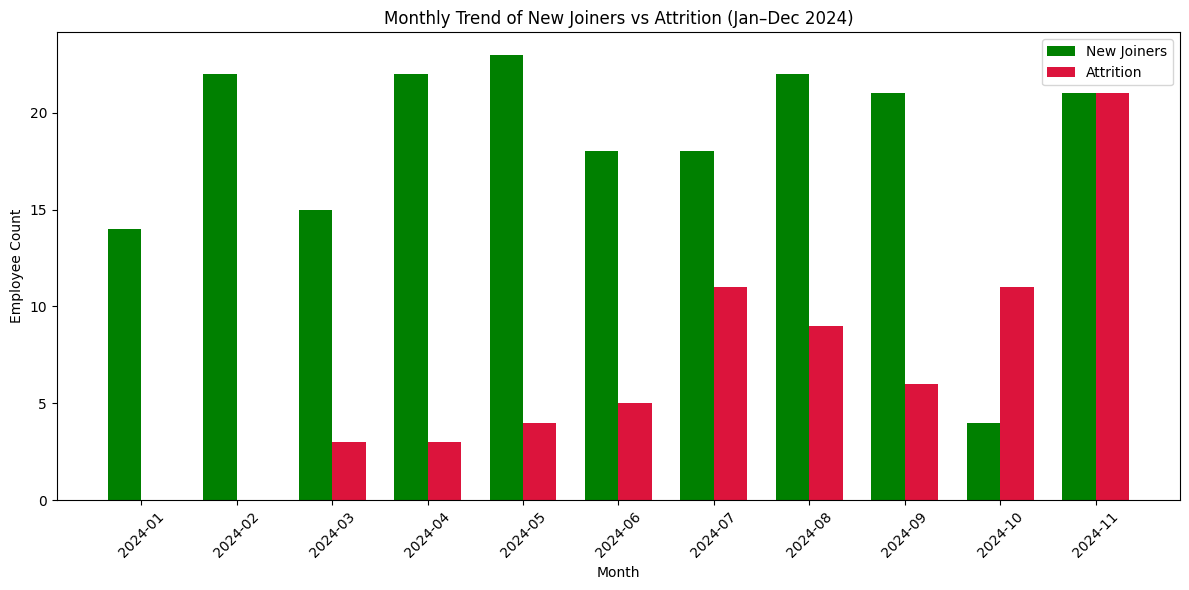

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = "employee_database_pune_restaurant_attrition.xlsx"
df = pd.read_excel(file_path)

# Step 1: Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 2: Convert date columns to datetime
df['date_of_joining'] = pd.to_datetime(df['date_of_joining'], errors='coerce')
df['date_of_leaving'] = pd.to_datetime(df['date_of_leaving'], errors='coerce')

# Step 3: Extract joining and leaving months
df['joining_month'] = df['date_of_joining'].dt.to_period('M')
df['leaving_month'] = df['date_of_leaving'].dt.to_period('M')

# Step 4: Filter for year 2024
df_2024 = df[
    (df['date_of_joining'].dt.year == 2024) |
    (df['date_of_leaving'].dt.year == 2024)
]

# Step 5: Count joiners and attritions per month
joiners_per_month = df_2024['joining_month'].value_counts().sort_index()
leavers_per_month = df_2024['leaving_month'].value_counts().sort_index()

# Step 6: Combine into one DataFrame
monthly_trend = pd.DataFrame({
    'New Joiners': joiners_per_month,
    'Attrition': leavers_per_month
}).fillna(0)

# Step 7: Bar chart (grouped)
months = [str(m) for m in monthly_trend.index]
x = np.arange(len(months))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, monthly_trend['New Joiners'], width, label='New Joiners', color='green')
bars2 = ax.bar(x + width/2, monthly_trend['Attrition'], width, label='Attrition', color='crimson')

# Labels and formatting
ax.set_xlabel('Month')
ax.set_ylabel('Employee Count')
ax.set_title('Monthly Trend of New Joiners vs Attrition (Jan–Dec 2024)')
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


Which location has the highest employee attrition rate?

In [ ]:
print(df.columns.tolist())


['employee_id', 'name', 'designation', 'department', 'location', 'date_of_joining', 'basic', 'hra', 'da', 'cca', 'other_allowance', 'incentives_amount', 'arrear', 'gross', 'pf', 'pt', 'misc_deduction_amount', 'net', 'remark', 'date_of_leaving', 'attrition', 'joining_month', 'leaving_month']


In [ ]:
total_employees=('put_that_column_here', 'count')


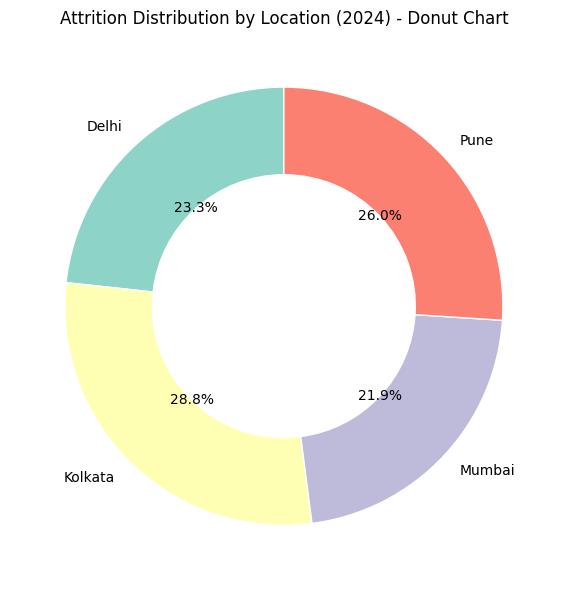

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel("employee_database_pune_restaurant_attrition.xlsx")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert date column to datetime
df['date_of_leaving'] = pd.to_datetime(df['date_of_leaving'], errors='coerce')

# Create attrition flag
df['is_attrition'] = df['date_of_leaving'].notnull()

# Dummy column to count employees
df['employee_count'] = 1

# Group by location for attritions
attrition_by_location = df[df['is_attrition']].groupby('location')['employee_count'].count()

# Plot Donut Chart
plt.figure(figsize=(8, 6))
colors = plt.cm.Set3.colors

# Pie chart with a hole
wedges, texts, autotexts = plt.pie(
    attrition_by_location,
    labels=attrition_by_location.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Center title
plt.title('Attrition Distribution by Location (2024) - Donut Chart')
plt.tight_layout()
plt.show()


What are the top 5 departments with the highest attrition?

In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("employee_database_pune_restaurant_attrition.xlsx")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert date of leaving to datetime
df['date_of_leaving'] = pd.to_datetime(df['date_of_leaving'], errors='coerce')

# Create attrition flag
df['is_attrition'] = df['date_of_leaving'].notnull()

# Group by department to count attritions
department_attrition = df[df['is_attrition']].groupby('department').size()

# Sort and get top 5 departments
top_5_departments = department_attrition.sort_values(ascending=False).head(5)

# Display result
print("Top 5 Departments with Highest Attrition:")
print(top_5_departments)


Top 5 Departments with Highest Attrition:
department
Kitchen       17
Bar           13
Cleaning      12
Service       12
Front Desk    11
dtype: int64


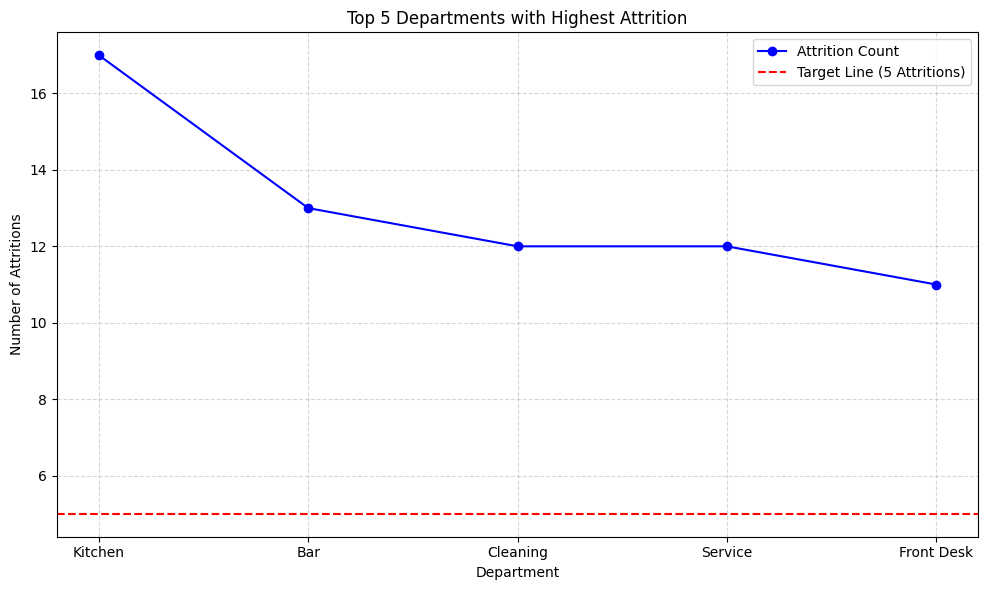

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel("employee_database_pune_restaurant_attrition.xlsx")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert date of leaving to datetime
df['date_of_leaving'] = pd.to_datetime(df['date_of_leaving'], errors='coerce')

# Create attrition flag
df['is_attrition'] = df['date_of_leaving'].notnull()

# Group by department and count attritions
department_attrition = df[df['is_attrition']].groupby('department').size()

# Get top 5 departments
top_5 = department_attrition.sort_values(ascending=False).head(5)

# Plot line chart with markers
plt.figure(figsize=(10, 6))
plt.plot(top_5.index, top_5.values, marker='o', linestyle='-', color='blue', label='Attrition Count')

# Add horizontal dashed red line at y=5
plt.axhline(y=5, color='red', linestyle='--', linewidth=1.5, label='Target Line (5 Attritions)')

# Add chart details
plt.title('Top 5 Departments with Highest Attrition')
plt.xlabel('Department')
plt.ylabel('Number of Attritions')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


What is the distribution of total gross salaries across locations or departments

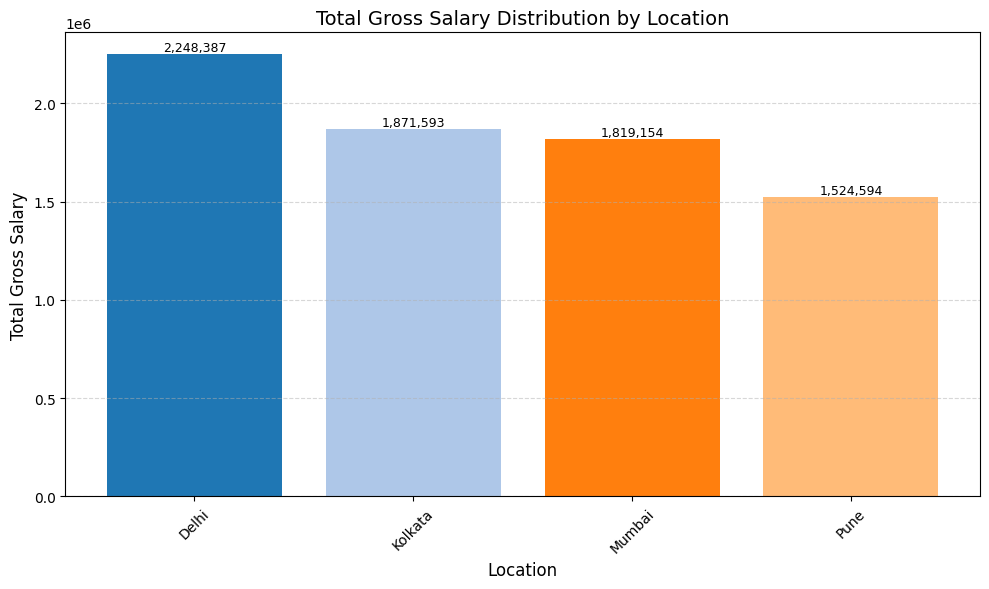

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel("employee_database_pune_restaurant_attrition.xlsx")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Ensure gross column is numeric
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')

# ---- OPTION 1: Group by LOCATION ----
gross_by_location = df.groupby('location')['gross'].sum().sort_values(ascending=False)

# ---- OPTION 2: Group by DEPARTMENT ----
gross_by_department = df.groupby('department')['gross'].sum().sort_values(ascending=False)

# ---- Choose which one to plot: ----
data_to_plot = gross_by_location  # OR use gross_by_department

# Set unique colors for each bar
colors = plt.cm.tab20.colors  # Up to 20 distinct colors

# Plot Cluster Bar Chart
plt.figure(figsize=(10, 6))
bars = plt.bar(data_to_plot.index, data_to_plot.values, color=colors[:len(data_to_plot)])

# Add chart details
plt.title('Total Gross Salary Distribution by Location', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Total Gross Salary', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,.0f}', va='bottom', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


How many employees left within 3 months of joining?

In [ ]:
import pandas as pd

# Load Excel file
df = pd.read_excel("employee_database_pune_restaurant_attrition.xlsx")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert dates
df['date_of_joining'] = pd.to_datetime(df['date_of_joining'], errors='coerce')
df['date_of_leaving'] = pd.to_datetime(df['date_of_leaving'], errors='coerce')

# Filter employees who left (non-null leaving date)
df['left_within_3_months'] = (
    df['date_of_leaving'].notnull() &
    ((df['date_of_leaving'] - df['date_of_joining']).dt.days <= 90)
)

# Count how many employees left within 3 months
count_left_within_3_months = df['left_within_3_months'].sum()
print(f"Employees who left within 3 months of joining: {count_left_within_3_months}")


Employees who left within 3 months of joining: 52


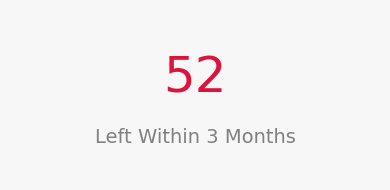

In [ ]:
import matplotlib.pyplot as plt

# Create a simple KPI card using Matplotlib
fig, ax = plt.subplots(figsize=(4, 2))
ax.text(0.5, 0.6, str(count_left_within_3_months), fontsize=36, ha='center', va='center', color='crimson')
ax.text(0.5, 0.25, "Left Within 3 Months", fontsize=14, ha='center', va='center', color='gray')

# Aesthetic settings
ax.set_facecolor('#f7f7f7')
fig.patch.set_facecolor('#f7f7f7')
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()


What percentage of deductions is due to breakages across roles like waiters, kitchen staff, etc.?

In [ ]:
print(df.columns.tolist())


['employee_id', 'name', 'designation', 'department', 'location', 'date_of_joining', 'basic', 'hra', 'da', 'cca', 'other_allowance', 'incentives_amount', 'arrear', 'gross', 'pf', 'pt', 'misc_deduction_amount', 'net', 'remark', 'date_of_leaving', 'attrition', 'left_within_3_months']


In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("employee_database_pune_restaurant_attrition.xlsx")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert deduction columns to numeric
df['misc_deduction_amount'] = pd.to_numeric(df['misc_deduction_amount'], errors='coerce')
df['net'] = pd.to_numeric(df['net'], errors='coerce')  # Assuming total deductions = gross - net

# Let's assume total deductions = gross - net (or use a separate 'deductions' column if available)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')
df['deductions'] = df['gross'] - df['net']

# Group by designation
grouped = df.groupby('designation').agg({
    'misc_deduction_amount': 'sum',
    'deductions': 'sum'
})

# Calculate percentage of deductions due to breakages
grouped['breakage_percent'] = (grouped['misc_deduction_amount'] / grouped['deductions']) * 100

# Sort descending
grouped = grouped.sort_values(by='breakage_percent', ascending=False)

# Display result
print(grouped[['breakage_percent']].round(2))


              breakage_percent
designation                   
Waiter                    5.72
Cashier                   5.31
Chef                      5.09
Bartender                 4.57
Receptionist              4.45
Sous Chef                 3.88
Cleaner                   3.81
Manager                   3.15


What is the average tenure (in months) of resigned vs absconded employees?

In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("employee_database_pune_restaurant_attrition.xlsx")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert dates to datetime
df['date_of_joining'] = pd.to_datetime(df['date_of_joining'], errors='coerce')
df['date_of_leaving'] = pd.to_datetime(df['date_of_leaving'], errors='coerce')

# Filter only resigned or absconded employees
df_exit = df[df['remark'].str.lower().isin(['resigned', 'abscond'])].copy()

# Calculate tenure in months
df_exit['tenure_months'] = ((df_exit['date_of_leaving'] - df_exit['date_of_joining']).dt.days) / 30.44

# Group by remark and calculate average
avg_tenure = df_exit.groupby('remark')['tenure_months'].mean().round(2)

# Display result
print("Average Tenure (in months) by Exit Type:")
print(avg_tenure)


Average Tenure (in months) by Exit Type:
remark
Resigned    2.03
Name: tenure_months, dtype: float64


KPI


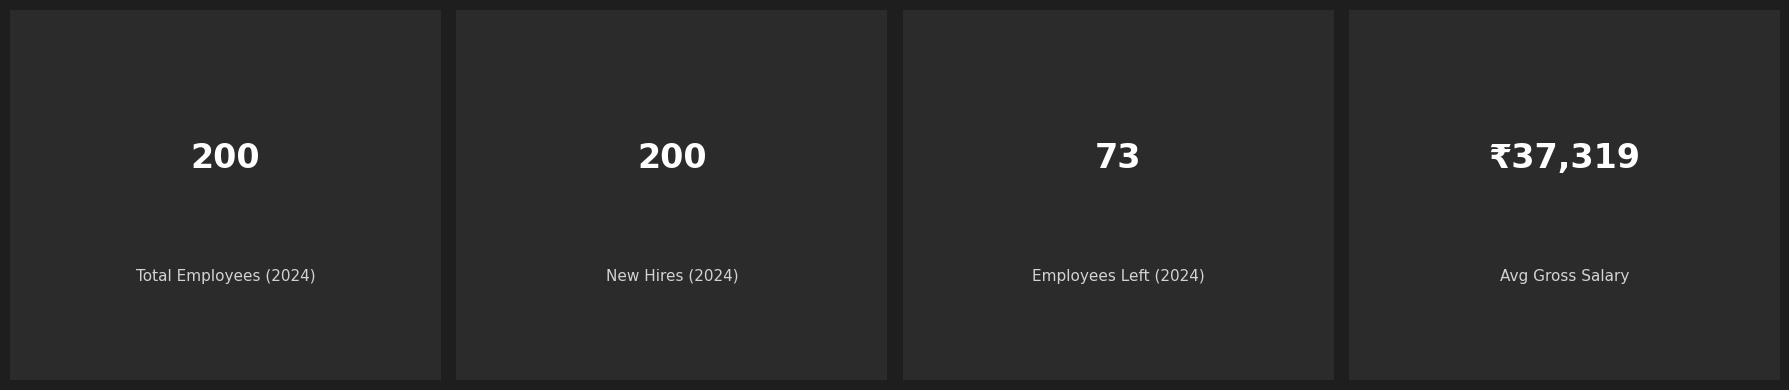

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Load and clean data
df = pd.read_excel("employee_database_pune_restaurant_attrition.xlsx")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert dates
df['date_of_joining'] = pd.to_datetime(df['date_of_joining'], errors='coerce')
df['date_of_leaving'] = pd.to_datetime(df['date_of_leaving'], errors='coerce')

# Filter 2024 data
df_2024 = df[
    (df['date_of_joining'].dt.year <= 2024) &
    ((df['date_of_leaving'].isna()) | (df['date_of_leaving'].dt.year >= 2024))
]

# KPIs
total_employees = df_2024.shape[0]
new_hires = df[df['date_of_joining'].dt.year == 2024].shape[0]
total_left = df[df['date_of_leaving'].dt.year == 2024].shape[0]
average_salary = df['gross'].mean().round(2)

kpis = {
    'Total Employees (2024)': total_employees,
    'New Hires (2024)': new_hires,
    'Employees Left (2024)': total_left,
    'Avg Gross Salary': f"₹{average_salary:,.0f}"
}

# --- KPI Card Styling ---
fig, axes = plt.subplots(1, 4, figsize=(18, 4))
fig.patch.set_facecolor('#1e1e1e')  # Dark background

for ax, (title, value) in zip(axes, kpis.items()):
    ax.set_facecolor('#2b2b2b')  # Card background
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Rounded rectangle behind the text
    rect = FancyBboxPatch(
        (0, 0), 1, 1,
        boxstyle="round,pad=0.02,rounding_size=15",
        transform=ax.transAxes,
        facecolor='#2b2b2b',
        edgecolor='none'
    )
    ax.add_patch(rect)

    # Add value and label text
    ax.text(0.5, 0.6, str(value), fontsize=24, ha='center', va='center', color='white', weight='bold')
    ax.text(0.5, 0.28, title, fontsize=11, ha='center', va='center', color='lightgray')

plt.tight_layout()
plt.show()
